In [1]:
# Jump-Start Example: Python analysis of MSPA Software Survey

# Update 2017-09-21 by Tom Miller and Kelsey O'Neill
# Update 2018-06-30 by Tom Miller v005 transformation code added

# tested under Python 3.6.1 :: Anaconda custom (x86_64)
# on Windows 10.0 and Mac OS Sierra 10.12.2 

# shows how to read in data from a comma-delimited text file
# manipuate data, create new count variables, define categorical variables,
# work with dictionaries and lambda mapping functions for recoding data 

# visualizations in this program are routed to external pdf files
# so they may be included in printed or electronic reports

# prepare for Python version 3x features and functions
# these two lines of code are needed for Python 2.7 only
# commented out for Python 3.x versions
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# external libraries for visualizations and data manipulation
# ensure that these packages have been installed prior to calls
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map

# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)


# read in comma-delimited text file, creating a pandas DataFrame object
# note that IPAddress is formatted as an actual IP address
# but is actually a random-hash of the original IP address
valid_survey_input = pd.read_csv('mspa-survey-data.csv')

# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

# examine the structure of the DataFrame object
print('\nContents of initial survey data ---------------')

# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Respondents =', len(valid_survey_input)) 

# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
print(valid_survey_input.columns)

# abbreviated printing of the first five rows of the data frame
print(pd.DataFrame.head(valid_survey_input)) 

# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})
    

# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']
                     
# single scatter plot example
fig, axis = plt.subplots()
axis.set_xlabel('Personal Preference for R')
axis.set_ylabel('Personal Preference for Python')
plt.title('R and Python Perferences')
scatter_plot = axis.scatter(survey_df['My_R'], 
    survey_df['My_Python'],
    facecolors = 'none', 
    edgecolors = 'blue') 
plt.savefig('plot-scatter-r-python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

survey_df_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Personal Preference for R',
    'Personal Preference for SAS',
    'Professional Java/Scala/Spark',
    'Professional JavaScript/HTML/CSS',
    'Professional Python',
    'Professional R',
    'Professional SAS',
    'Industry Java/Scala/Spark',
    'Industry Java/Script/HTML/CSS',
    'Industry Python',
    'Industry R',
    'Industry SAS'        
]    

# create a set of scatter plots for personal preferences
for i in range(5):
    for j in range(5):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'blue') 
            plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)  


# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = software_df) 

# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')
print(software_df.describe())

# descriptive statistics for one variable
print('\nDescriptive statistics for courses completed ---------------')
print(survey_df['Courses_Completed'].describe())

# ----------------------------------------------------------
# transformation code added with version v005
# ----------------------------------------------------------
# transformations a la Scikit Learn
# documentation at http://scikit-learn.org/stable/auto_examples/
#                  preprocessing/plot_all_scaling.html#sphx-glr-auto-
#                  examples-preprocessing-plot-all-scaling-
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes
X = survey_df['Courses_Completed'].dropna()

# Seaborn provides a convenient way to show the effects of transformations
# on the distribution of values being transformed
# Documentation at https://seaborn.pydata.org/generated/seaborn.distplot.html

unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

standard_fig, ax = plt.subplots()
#sns.distplot(StandardScaler().fit_transform(X)).set_title('StandardScaler') received help from other student
sns.distplot(StandardScaler().fit_transform(np.array(X).reshape(-1,1))).set_title('StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

minmax_fig, ax = plt.subplots()
#sns.distplot(MinMaxScaler().fit_transform(X)).set_title('MinMaxScaler') received help from other student
sns.distplot(MinMaxScaler().fit_transform(np.array(X).reshape(-1,1))).set_title('MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 
 
log_fig, ax = plt.subplots()
sns.distplot(np.log(X)).set_title('NaturalLog')
log_fig.savefig('Transformation-NaturalLog' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  



Contents of initial survey data ---------------

Number of Respondents = 207
Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')
              Personal_JavaScalaSpark  Personal

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



Descriptive statistics for survey data ---------------
          My_Java       My_JS   My_Python        My_R      My_SAS   Prof_Java  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean    10.135266    4.797101   31.304348   37.125604   16.637681    9.251208   
std     11.383477    6.757764   15.570982   14.576003   13.626400   13.167505   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   20.000000   30.000000    5.000000    0.000000   
50%      9.000000    0.000000   30.000000   35.000000   15.000000    5.000000   
75%     20.000000   10.000000   40.000000   50.000000   25.000000   15.000000   
max     70.000000   30.000000   90.000000  100.000000   75.000000   80.000000   

          Prof_JS  Prof_Python      Prof_R    Prof_SAS    Ind_Java  \
count  207.000000   207.000000  207.000000  207.000000  207.000000   
mean     5.840580    30.028986   36.415459   18.463768   11.942029   
std 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' 

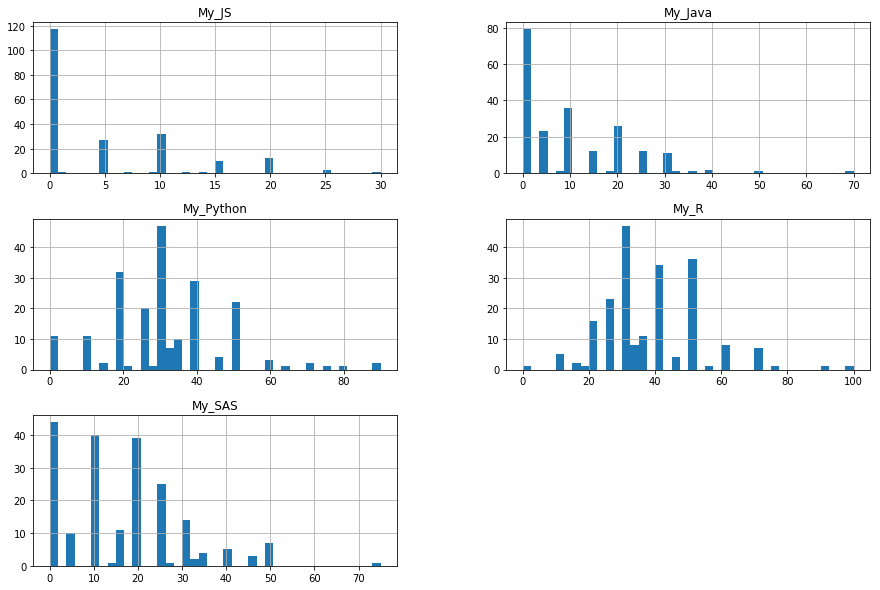

In [2]:
survey_df.loc[:,'My_Java':'My_SAS'].hist(bins=40, figsize=(15,10))
plt.show()

In [3]:
survey_df.loc[:,'My_Java':'My_SAS'].describe()

,My_Java,My_JS,My_Python,My_R,My_SAS
count,207.000000,207.000000,207.000000,207.000000,207.000000
mean,10.135266,4.797101,31.304348,37.125604,16.637681
std,11.383477,6.757764,15.570982,14.576003,13.626400
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,20.000000,30.000000,5.000000
50%,9.000000,0.000000,30.000000,35.000000,15.000000
75%,20.000000,10.000000,40.000000,50.000000,25.000000
max,70.000000,30.000000,90.000000,100.000000,75.000000


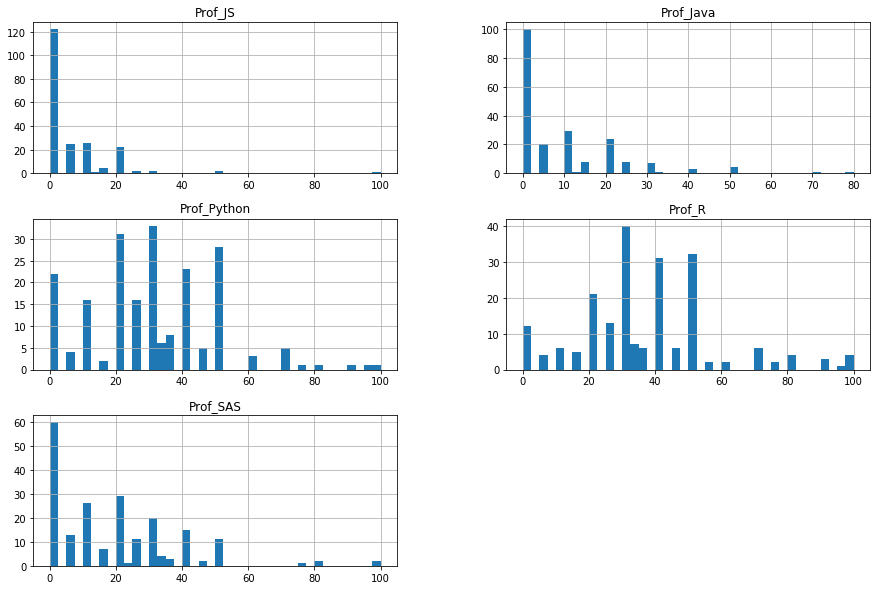

In [4]:
survey_df.loc[:,'Prof_Java':'Prof_SAS'].hist(bins=40, figsize=(15,10))
plt.show()

In [5]:
survey_df.loc[:,'Prof_Java':'Prof_SAS'].describe()

,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS
count,207.000000,207.000000,207.000000,207.000000,207.000000
mean,9.251208,5.840580,30.028986,36.415459,18.463768
std,13.167505,10.812555,19.144802,20.847606,18.831841
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,20.000000,25.000000,0.000000
50%,5.000000,0.000000,30.000000,33.000000,15.000000
75%,15.000000,10.000000,40.000000,50.000000,30.000000
max,80.000000,100.000000,100.000000,100.000000,100.000000


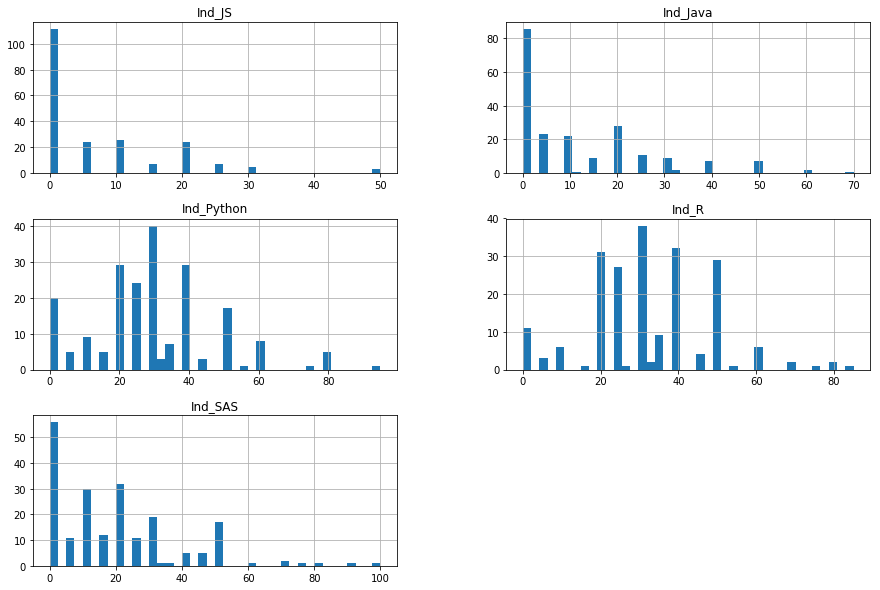

In [6]:
survey_df.loc[:,'Ind_Java':'Ind_SAS'].hist(bins=40, figsize=(15,10))
plt.show()

In [7]:
survey_df.loc[:,'Ind_Java':'Ind_SAS'].describe()

,Ind_Java,Ind_JS,Ind_Python,Ind_R,Ind_SAS
count,207.000000,207.000000,207.000000,207.000000,207.000000
mean,11.942029,6.966184,29.772947,32.434783,18.884058
std,14.706399,10.030721,17.959816,15.912209,19.137623
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,20.000000,22.500000,0.000000
50%,5.000000,0.000000,30.000000,30.000000,15.000000
75%,20.000000,10.000000,40.000000,40.000000,30.000000
max,70.000000,50.000000,95.000000,85.000000,100.000000


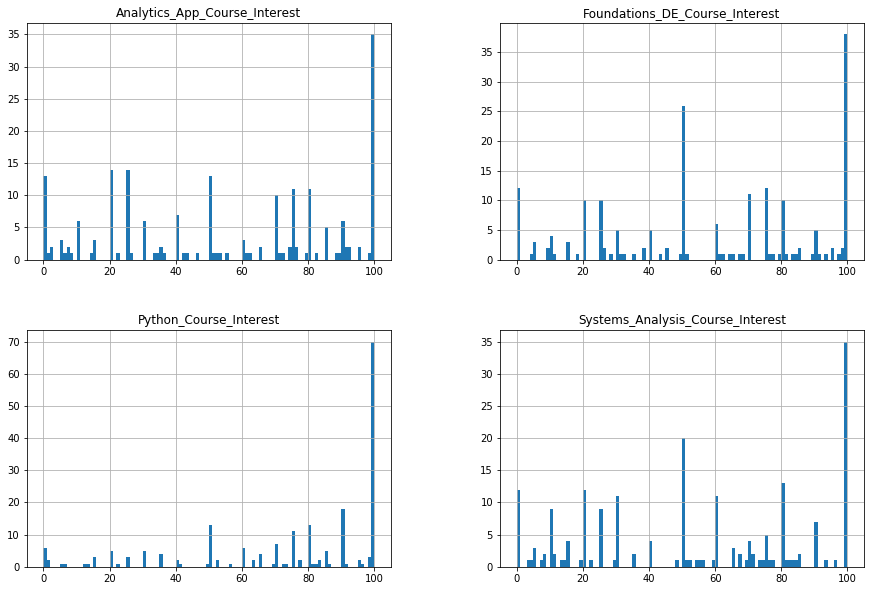

In [8]:
survey_df.loc[:,'Python_Course_Interest':'Systems_Analysis_Course_Interest'].hist(bins=100, figsize=(15,10))
plt.show()


In [9]:
survey_df.loc[:,'Python_Course_Interest':'Systems_Analysis_Course_Interest'].describe()

,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest
count,206.000000,200.000000,203.000000,200.000000
mean,73.529126,58.045000,55.201970,53.630000
std,29.835429,32.588079,34.147954,33.539493
min,0.000000,0.000000,0.000000,0.000000
25%,53.000000,29.500000,25.000000,21.500000
50%,82.500000,60.000000,60.000000,51.500000
75%,100.000000,89.250000,85.000000,80.250000
max,100.000000,100.000000,100.000000,100.000000


In [10]:
survey_df['Courses_Completed'].value_counts()

2.0     25
5.0     24
7.0     24
10.0    20
6.0     16
9.0     14
3.0     13
4.0     13
8.0     11
11.0    11
12.0    10
1.0      6
Name: Courses_Completed, dtype: int64

In [11]:
survey_df['Graduate_Date'].value_counts()

Spring 2018      30
Winter 2017      25
Winter 2018      25
Fall 2018        20
Spring 2017      19
Fall 2017        14
Summer 2017      14
Fall 2016        13
Summer 2018      11
Winter 2019      11
Spring 2019       9
Fall 2019         5
2020 or Later     5
Summer 2019       3
Name: Graduate_Date, dtype: int64